In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('archive/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

K nearest neighbours

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = model1.predict(X_test)

In [15]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

In [16]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[83, 24],
       [19, 28]], dtype=int64)

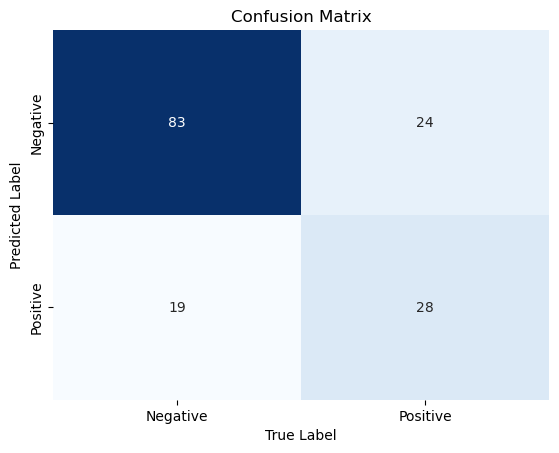

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.xticks(ticks=[1.5,0.5], labels=['Positive','Negative'])
plt.yticks(ticks=[1.5,0.5], labels=['Positive','Negative'])
plt.show()

In [24]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

Accuracy: 0.7207792207792207


In [25]:
err = 1-acc
print('Error:',err)

Error: 0.27922077922077926


In [26]:
prec = precision_score(y_test,y_pred)
print('Precision:',prec)

Precision: 0.5384615384615384


In [27]:
rec = recall_score(y_test,y_pred)
print('Recall Score:',rec)

Recall Score: 0.5957446808510638


In [28]:
f1s = f1_score(y_test,y_pred)
print('F1 Score:',f1s)

F1 Score: 0.5656565656565656


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       107
           1       0.54      0.60      0.57        47

    accuracy                           0.72       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.72      0.72       154

